In [3]:
from pathlib import Path

DATA_ROOT = Path("../data/raw/barber")

# See what files we actually have
list(DATA_ROOT.glob("*"))

[PosixPath('../data/raw/barber/05_Results by Class GR Cup Race 1 Official_Anonymized.CSV'),
 PosixPath('../data/raw/barber/99_Best 10 Laps By Driver_Race 1_Anonymized.CSV'),
 PosixPath('../data/raw/barber/03_Results GR Cup Race 2 Official_Anonymized.CSV'),
 PosixPath('../data/raw/barber/R2_barber_telemetry_data.csv'),
 PosixPath('../data/raw/barber/.DS_Store'),
 PosixPath('../data/raw/barber/03_Provisional Results_Race 2_Anonymized.CSV'),
 PosixPath('../data/raw/barber/99_Best 10 Laps By Driver_Race 2_Anonymized.CSV'),
 PosixPath('../data/raw/barber/R2_barber_lap_time.csv'),
 PosixPath('../data/raw/barber/R1_barber_lap_start.csv'),
 PosixPath('../data/raw/barber/R1_barber_telemetry_vehicle_GR86-002-000.csv'),
 PosixPath('../data/raw/barber/03_Provisional Results_Race 1_Anonymized.CSV'),
 PosixPath('../data/raw/barber/R1_barber_lap_time.csv'),
 PosixPath('../data/raw/barber/23_AnalysisEnduranceWithSections_Race 1_Anonymized.CSV'),
 PosixPath('../data/raw/barber/R1_barber_telemetry_data.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

DATA_ROOT = Path("../data/raw/barber")
SEC_PATH = DATA_ROOT / "23_AnalysisEnduranceWithSections_Race 1_Anonymized.CSV"

print("Using:", SEC_PATH, "exists? ->", SEC_PATH.exists())

df_sec = pd.read_csv(SEC_PATH)
df_sec.head()

Using: ../data/raw/barber/23_AnalysisEnduranceWithSections_Race 1_Anonymized.CSV exists? -> True


,NUMBER; DRIVER_NUMBER; LAP_NUMBER; LAP_TIME; LAP_IMPROVEMENT; CROSSING_FINISH_LINE_IN_PIT; S1; S1_IMPROVEMENT; S2; S2_IMPROVEMENT; S3; S3_IMPROVEMENT; KPH; ELAPSED; HOUR;S1_LARGE;S2_LARGE;S3_LARGE;TOP_SPEED;PIT_TIME;CLASS;GROUP;MANUFACTURER;FLAG_AT_FL;S1_SECONDS;S2_SECONDS;S3_SECONDS;IM1a_time;IM1a_elapsed;IM1_time;IM1_elapsed;IM2a_time;IM2a_elapsed;IM2_time;IM2_elapsed;IM3a_time;IM3a_elapsed;FL_time;FL_elapsed
0,3;1;1;1:54.168;0;;33.413;0;43.534;0;37.221;0;1...
1,3;1;2;2:13.691;0;;39.57;0;57.345;0;36.776;0;99...
2,3;1;3;1:58.021;0;;33.801;0;49.853;0;34.367;0;1...
3,3;1;4;1:40.861;0;;27.568;0;43.834;0;29.459;0;1...
4,3;1;5;1:39.725;0;;27.214;0;43.389;0;29.122;0;1...


In [5]:
df_sec.columns

Index(['NUMBER; DRIVER_NUMBER; LAP_NUMBER; LAP_TIME; LAP_IMPROVEMENT; CROSSING_FINISH_LINE_IN_PIT; S1; S1_IMPROVEMENT; S2; S2_IMPROVEMENT; S3; S3_IMPROVEMENT; KPH; ELAPSED; HOUR;S1_LARGE;S2_LARGE;S3_LARGE;TOP_SPEED;PIT_TIME;CLASS;GROUP;MANUFACTURER;FLAG_AT_FL;S1_SECONDS;S2_SECONDS;S3_SECONDS;IM1a_time;IM1a_elapsed;IM1_time;IM1_elapsed;IM2a_time;IM2a_elapsed;IM2_time;IM2_elapsed;IM3a_time;IM3a_elapsed;FL_time;FL_elapsed'], dtype='object')

In [9]:
# normalize column names (remove leading/trailing spaces etc.)
df_sec.columns = df_sec.columns.str.strip()
print([repr(c) for c in df_sec.columns])  # quick sanity check

["'NUMBER; DRIVER_NUMBER; LAP_NUMBER; LAP_TIME; LAP_IMPROVEMENT; CROSSING_FINISH_LINE_IN_PIT; S1; S1_IMPROVEMENT; S2; S2_IMPROVEMENT; S3; S3_IMPROVEMENT; KPH; ELAPSED; HOUR;S1_LARGE;S2_LARGE;S3_LARGE;TOP_SPEED;PIT_TIME;CLASS;GROUP;MANUFACTURER;FLAG_AT_FL;S1_SECONDS;S2_SECONDS;S3_SECONDS;IM1a_time;IM1a_elapsed;IM1_time;IM1_elapsed;IM2a_time;IM2a_elapsed;IM2_time;IM2_elapsed;IM3a_time;IM3a_elapsed;FL_time;FL_elapsed'"]


In [10]:
VEH_COL = "NUMBER"
LAP_COL = "LAP_NUMBER"

S1_COL = "S1_SECONDS"
S2_COL = "S2_SECONDS"
S3_COL = "S3_SECONDS"

print("VEH_COL:", VEH_COL)
print("LAP_COL:", LAP_COL)
print("Sector cols:", S1_COL, S2_COL, S3_COL)

VEH_COL: NUMBER
LAP_COL: LAP_NUMBER
Sector cols: S1_SECONDS S2_SECONDS S3_SECONDS


In [12]:
for c in df_sec.columns:
    print(repr(c))

'NUMBER; DRIVER_NUMBER; LAP_NUMBER; LAP_TIME; LAP_IMPROVEMENT; CROSSING_FINISH_LINE_IN_PIT; S1; S1_IMPROVEMENT; S2; S2_IMPROVEMENT; S3; S3_IMPROVEMENT; KPH; ELAPSED; HOUR;S1_LARGE;S2_LARGE;S3_LARGE;TOP_SPEED;PIT_TIME;CLASS;GROUP;MANUFACTURER;FLAG_AT_FL;S1_SECONDS;S2_SECONDS;S3_SECONDS;IM1a_time;IM1a_elapsed;IM1_time;IM1_elapsed;IM2a_time;IM2a_elapsed;IM2_time;IM2_elapsed;IM3a_time;IM3a_elapsed;FL_time;FL_elapsed'


In [13]:
def pick_sector_col(prefix: str):
    matches = [c for c in df_sec.columns if prefix.lower() in c.lower() and "sec" in c.lower()]
    print(prefix, "candidates:", matches)
    if not matches:
        raise ValueError(f"No matches found for {prefix}")
    return matches[0]

VEH_COL = "NUMBER"
LAP_COL = "LAP_NUMBER"

S1_COL = pick_sector_col("s1")
S2_COL = pick_sector_col("s2")
S3_COL = pick_sector_col("s3")

print("Using:", VEH_COL, LAP_COL, S1_COL, S2_COL, S3_COL)

s1 candidates: ['NUMBER; DRIVER_NUMBER; LAP_NUMBER; LAP_TIME; LAP_IMPROVEMENT; CROSSING_FINISH_LINE_IN_PIT; S1; S1_IMPROVEMENT; S2; S2_IMPROVEMENT; S3; S3_IMPROVEMENT; KPH; ELAPSED; HOUR;S1_LARGE;S2_LARGE;S3_LARGE;TOP_SPEED;PIT_TIME;CLASS;GROUP;MANUFACTURER;FLAG_AT_FL;S1_SECONDS;S2_SECONDS;S3_SECONDS;IM1a_time;IM1a_elapsed;IM1_time;IM1_elapsed;IM2a_time;IM2a_elapsed;IM2_time;IM2_elapsed;IM3a_time;IM3a_elapsed;FL_time;FL_elapsed']
s2 candidates: ['NUMBER; DRIVER_NUMBER; LAP_NUMBER; LAP_TIME; LAP_IMPROVEMENT; CROSSING_FINISH_LINE_IN_PIT; S1; S1_IMPROVEMENT; S2; S2_IMPROVEMENT; S3; S3_IMPROVEMENT; KPH; ELAPSED; HOUR;S1_LARGE;S2_LARGE;S3_LARGE;TOP_SPEED;PIT_TIME;CLASS;GROUP;MANUFACTURER;FLAG_AT_FL;S1_SECONDS;S2_SECONDS;S3_SECONDS;IM1a_time;IM1a_elapsed;IM1_time;IM1_elapsed;IM2a_time;IM2a_elapsed;IM2_time;IM2_elapsed;IM3a_time;IM3a_elapsed;FL_time;FL_elapsed']
s3 candidates: ['NUMBER; DRIVER_NUMBER; LAP_NUMBER; LAP_TIME; LAP_IMPROVEMENT; CROSSING_FINISH_LINE_IN_PIT; S1; S1_IMPROVEMENT; S2; 

In [15]:
from pathlib import Path
import pandas as pd

DATA_ROOT = Path("../data/raw/barber")
SEC_PATH  = DATA_ROOT / "23_AnalysisEnduranceWithSections_Race 1_Anonymized.CSV"

print("Using:", SEC_PATH, "exists? ->", SEC_PATH.exists())

df_sec = pd.read_csv(SEC_PATH, sep=";")   # <-- key change
df_sec.columns = df_sec.columns.str.strip()  # normalize names
print(df_sec.shape)
print([repr(c) for c in df_sec.columns])
df_sec.head()

Using: ../data/raw/barber/23_AnalysisEnduranceWithSections_Race 1_Anonymized.CSV exists? -> True
(579, 39)
["'NUMBER'", "'DRIVER_NUMBER'", "'LAP_NUMBER'", "'LAP_TIME'", "'LAP_IMPROVEMENT'", "'CROSSING_FINISH_LINE_IN_PIT'", "'S1'", "'S1_IMPROVEMENT'", "'S2'", "'S2_IMPROVEMENT'", "'S3'", "'S3_IMPROVEMENT'", "'KPH'", "'ELAPSED'", "'HOUR'", "'S1_LARGE'", "'S2_LARGE'", "'S3_LARGE'", "'TOP_SPEED'", "'PIT_TIME'", "'CLASS'", "'GROUP'", "'MANUFACTURER'", "'FLAG_AT_FL'", "'S1_SECONDS'", "'S2_SECONDS'", "'S3_SECONDS'", "'IM1a_time'", "'IM1a_elapsed'", "'IM1_time'", "'IM1_elapsed'", "'IM2a_time'", "'IM2a_elapsed'", "'IM2_time'", "'IM2_elapsed'", "'IM3a_time'", "'IM3a_elapsed'", "'FL_time'", "'FL_elapsed'"]


,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,...,IM1_time,IM1_elapsed,IM2a_time,IM2a_elapsed,IM2_time,IM2_elapsed,IM3a_time,IM3a_elapsed,FL_time,FL_elapsed
0,3,1,1,1:54.168,0,NaN,33.413,0,43.534,0,...,10.843,33.413,30.646,1:04.059,12.888,1:16.947,11.800,1:28.747,25.421,1:54.168
1,3,1,2,2:13.691,0,NaN,39.570,0,57.345,0,...,18.801,39.570,35.764,1:15.334,21.581,1:36.915,13.529,1:50.444,23.247,2:13.691
2,3,1,3,1:58.021,0,NaN,33.801,0,49.853,0,...,12.357,33.801,34.462,1:08.263,15.391,1:23.654,13.223,1:36.877,21.144,1:58.021
3,3,1,4,1:40.861,0,NaN,27.568,0,43.834,0,...,10.053,27.568,30.912,58.480,12.922,1:11.402,11.353,1:22.755,18.106,1:40.861
4,3,1,5,1:39.725,0,NaN,27.214,0,43.389,0,...,9.937,27.214,30.557,57.771,12.832,1:10.603,11.158,1:21.761,17.964,1:39.725


In [16]:
VEH_COL = "NUMBER"        # car number
LAP_COL = "LAP_NUMBER"    # lap index

S1_COL = "S1_SECONDS"
S2_COL = "S2_SECONDS"
S3_COL = "S3_SECONDS"

print("VEH_COL:", VEH_COL)
print("LAP_COL:", LAP_COL)
print("Sector cols:", S1_COL, S2_COL, S3_COL)

VEH_COL: NUMBER
LAP_COL: LAP_NUMBER
Sector cols: S1_SECONDS S2_SECONDS S3_SECONDS


In [17]:
df_sec["S1_s"] = df_sec[S1_COL].astype(float)
df_sec["S2_s"] = df_sec[S2_COL].astype(float)
df_sec["S3_s"] = df_sec[S3_COL].astype(float)

df_sec[[VEH_COL, LAP_COL, "S1_s", "S2_s", "S3_s"]].head()

,NUMBER,LAP_NUMBER,S1_s,S2_s,S3_s
0,3,1,33.413,43.534,37.221
1,3,2,39.570,57.345,36.776
2,3,3,33.801,49.853,34.367
3,3,4,27.568,43.834,29.459
4,3,5,27.214,43.389,29.122


In [18]:
sector_stats = (
    df_sec
    .groupby(VEH_COL)[["S1_s", "S2_s", "S3_s"]]
    .agg(["mean", "min"])
)

sector_stats.columns = [
    f"{sec}_{stat}" for (sec, stat) in sector_stats.columns.to_flat_index()
]
sector_stats = sector_stats.reset_index()
sector_stats.head()

,NUMBER,S1_s_mean,S1_s_min,S2_s_mean,S2_s_min,S3_s_mean,S3_s_min
0,2,27.754630,26.842,43.794667,42.515,29.529370,28.638
1,3,28.139889,26.961,44.147556,42.981,30.068481,29.055
2,5,27.996148,26.706,44.491815,43.004,30.033519,28.982
3,7,27.745778,26.824,43.850481,42.701,29.765963,28.750
4,13,27.504259,26.592,43.589519,42.380,29.463074,28.418


In [19]:
CAR_NUM = 2   # <-- update to the actual NUMBER for your GR86
sector_stats["is_our_car"] = sector_stats[VEH_COL] == CAR_NUM

/Users/macbook/Desktop/FPTAI/DataScienceHackbyToyota/tmp/ipykernel_6492/828529184.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(vals, vert=True, labels=[sec])
/Users/macbook/Desktop/FPTAI/DataScienceHackbyToyota/tmp/ipykernel_6492/828529184.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(vals, vert=True, labels=[sec])
/Users/macbook/Desktop/FPTAI/DataScienceHackbyToyota/tmp/ipykernel_6492/828529184.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(vals, vert=True, labels=[sec])


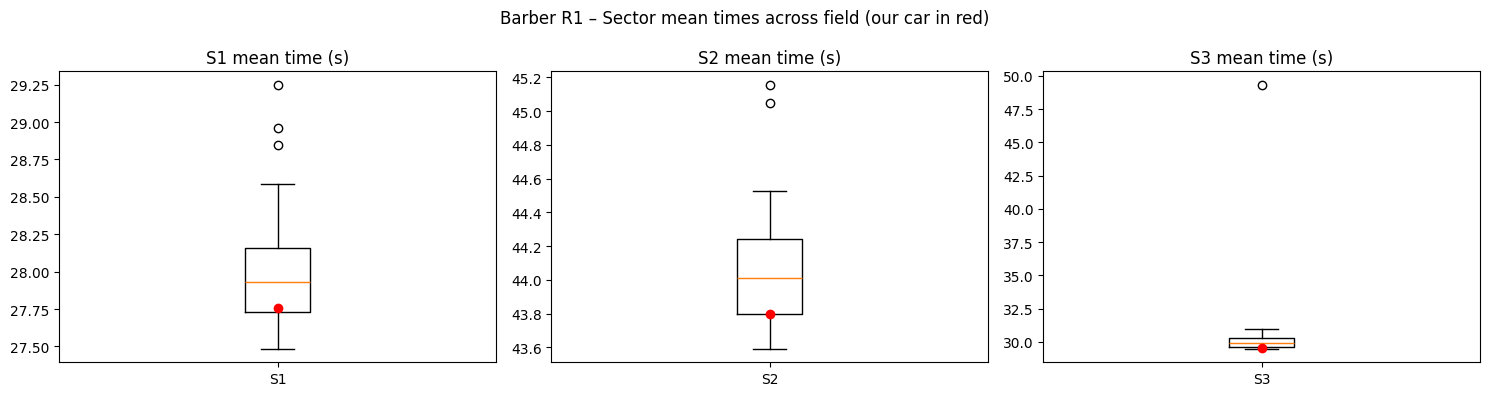

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=False)

for i, (sec, col) in enumerate([("S1", "S1_s_mean"),
                                ("S2", "S2_s_mean"),
                                ("S3", "S3_s_mean")]):
    ax = axes[i]
    vals = sector_stats[col]
    ax.boxplot(vals, vert=True, labels=[sec])

    our_val = sector_stats.loc[sector_stats["is_our_car"], col].iloc[0]
    ax.scatter(1, our_val, color="red", zorder=3)
    ax.set_title(f"{sec} mean time (s)")

plt.suptitle("Barber R1 – Sector mean times across field (our car in red)")
plt.tight_layout()
plt.show()

In [21]:
def rank_column(colname: str) -> int:
    return (
        sector_stats[colname]
        .rank(method="min")
        .loc[sector_stats["is_our_car"]]
        .iloc[0]
    )

our_summary = pd.DataFrame([{
    "car_number": CAR_NUM,
    "S1_mean_s": sector_stats.loc[sector_stats["is_our_car"], "S1_s_mean"].iloc[0],
    "S1_mean_rank": rank_column("S1_s_mean"),
    "S2_mean_s": sector_stats.loc[sector_stats["is_our_car"], "S2_s_mean"].iloc[0],
    "S2_mean_rank": rank_column("S2_s_mean"),
    "S3_mean_s": sector_stats.loc[sector_stats["is_our_car"], "S3_s_mean"].iloc[0],
    "S3_mean_rank": rank_column("S3_s_mean"),
}])

our_summary

,car_number,S1_mean_s,S1_mean_rank,S2_mean_s,S2_mean_rank,S3_mean_s,S3_mean_rank
0,2,27.75463,8.0,43.794667,5.0,29.52937,3.0


### Barber R1 – Sector performance vs field (Car #2)

Using the official *AnalysisEnduranceWithSections* file, we computed the mean
sector times for every car and compared our car (#2) against the field.

From the boxplots and summary:

- **S1_mean ≈ 27.76 s, rank 8 / 20**
  - Our car sits around the **upper-midfield** in S1.
  - There is some spread above and below us, so S1 is the main opportunity to
    gain time relative to competitors.

- **S2_mean ≈ 43.79 s, rank ≈ top-3**
  - The red dot is near the bottom of the S2 distribution, meaning we are one of
    the **stronger cars in S2**.
  - Strategy can treat S2 as a strength: we are less vulnerable to being
    overtaken here and can use it to close gaps.

- **S3_mean ≈ 29.53 s, rank 3 / 20**
  - S3 is also a **clear strength** – our average is among the quickest cars.
  - Late-lap pace is good, which matters for overtakes and defending near the
    start/finish line.

**Takeaway:** Barber R1 for car #2 is characterized by a *relative weakness in
Sector 1* and strong, consistent pace in **S2 and S3**. The driver-insight layer
should emphasize S1 braking/turn-in improvements, while the strategy brain can
assume we are competitive or advantaged in the back half of the lap.

In [22]:
from pathlib import Path

OUT_DIR = Path("../data/processed/barber")
OUT_DIR.mkdir(parents=True, exist_ok=True)

sector_stats.to_csv(OUT_DIR / "barber_r1_sector_stats_all_cars.csv", index=False)
our_summary.to_csv(OUT_DIR / "barber_r1_car2_sector_summary.csv", index=False)